### Import all libraries that may require

In [8]:
import sklearn as sk
import numpy as np
import pandas as pd
import math
import scipy
import matplotlib.pyplot as plt

###  Import data from csv file to 

In [9]:
Fraud_Data = pd.read_csv('creditcard.csv',delimiter=',')
print ('Data imported')

Data imported


### Checking if data has null values 

In [10]:
Fraud_Data[Fraud_Data.apply(lambda x: min(x) == max(x), 1)] 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class


In [11]:
Fraud_Data.isnull().any(axis=1).filter('True')

Series([], dtype: bool)

### Find out Covarience matrix

In [12]:
Fraud_Data.cov().to_csv("covarience_matrix.csv")

In [13]:
Fraud_Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [14]:
Fraud_Data1 = Fraud_Data[['V18','V4','V11','V7','V3','V10','V16','V12','V14','V17']] # Higher Co-relation
output_label = Fraud_Data[['Class']]

In [15]:
Fraud_Data1.head()

,V18,V4,V11,V7,V3,V10,V16,V12,V14,V17
0,0.025791,1.378155,-0.551600,0.239599,2.536347,0.090794,-0.470401,-0.617801,-0.311169,0.207971
1,-0.183361,0.448154,1.612727,-0.078803,0.166480,-0.166974,0.463917,1.065235,-0.143772,-0.114805
2,-0.121359,0.379780,0.624501,0.791461,1.773209,0.207643,-2.890083,0.066084,-0.165946,1.109969
3,1.965775,-0.863291,-0.226487,0.237609,1.792993,-0.054952,-1.059647,0.178228,-0.287924,-0.684093
4,-0.038195,0.403034,-0.822843,0.592941,1.548718,0.753074,-0.451449,0.538196,-1.119670,-0.237033


In [16]:
train_indices = np.random.rand(len(Fraud_Data1)) < 0.8
train = Fraud_Data1[train_indices]
output_train = output_label[train_indices]
test = Fraud_Data1[~train_indices]
output_test = output_label[~train_indices]

In [17]:
train_all = Fraud_Data[train_indices]
test_all = Fraud_Data[~train_indices]

## SVM

In [18]:
from sklearn import svm

### Using only top 10 col with highest correlation

In [19]:
svm_classifier_10 = sk.svm.SVC()

In [21]:
svm_classifier_10.fit(train,output_train)

/home/kdeshmukh/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
prediction_10 = svm_classifier_10.predict(test)

In [24]:
svm_classifier_all = sk.svm.SVC()

In [25]:
svm_classifier_all.fit(train_all,output_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
prediction_all = svm_classifier_all.predict(test_all)

### Data Analysis

In [32]:
from sklearn.metrics import accuracy_score

Accuracy Score :

In [33]:
print "Accuracy for SVM with 10 features :"+ str(accuracy_score(output_test,prediction_10))

Accuracy for SVM with 10 features :0.999419555696


In [34]:
print "Accuracy for SVM with ALL features :"+ str(accuracy_score(output_test,prediction_all))

Accuracy for SVM with ALL features :0.998223488646


In [30]:
print "Confusion matrix for SVM with 10 features"
sk.metrics.confusion_matrix(output_test,prediction_10)

array([[56743,     2],
       [   31,    77]])

In [31]:
print "Confusion matrix for SVM with ALL features"
sk.metrics.confusion_matrix(output_test,prediction_all)

array([[56745,     0],
       [  101,     7]])

In [35]:
precision_10, recall_10, _ = sk.metrics.precision_recall_curve(output_test,prediction_10)

In [37]:
precision_all, recall_all, _ = sk.metrics.precision_recall_curve(output_test,prediction_all)

 PR curve :


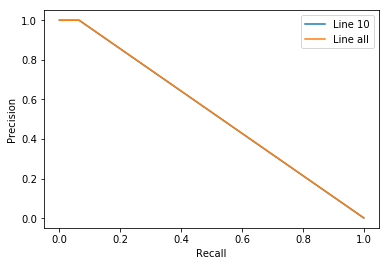

In [53]:
print " PR curve :"
line_10, = plt.plot(recall_10,precision_10,label='Line 10')
line_all, = plt.plot(recall_all, precision_all,label='Line all')
plt.legend(handles=[line_10, line_all])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.show()

In [54]:
roc_10_x,roc_10_y,_ = sk.metrics.roc_curve(output_test,prediction_10)

In [55]:
roc_all_x,roc_all_y,_ = sk.metrics.roc_curve(output_test,prediction_all)

ROC Curve :


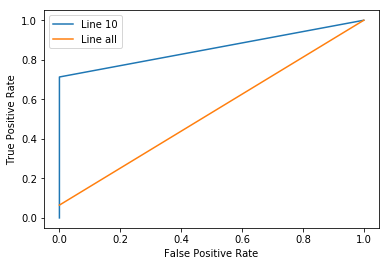

In [56]:
print "ROC Curve :"
line_10, = plt.plot(roc_10_x,roc_10_y,label='Line 10')
line_all, = plt.plot(roc_all_x,roc_all_y,label='Line all')
plt.legend(handles=[line_10, line_all])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Area under the curve for ROC

In [59]:
sk.metrics.roc_auc_score(output_test,prediction_10)

0.85646385878344633

In [60]:
sk.metrics.roc_auc_score(output_test,prediction_all)

0.53240740740740744

Since SVM for 10 features is working better than we will go forward with svm_classifier_10